In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import cluster
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

/Users/devinarnold/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
yelp_DF = pd.read_csv('/Users/devinarnold/yelp-dataset/checkin_money_merge.csv',
                      dtype={'Unamed: 0': int,
                           'business_id' : object,
                           'stars' : float,
                           'review_count' : float,
                           'is_open' : float,
                           'categories' : object,
                           'Median' : float,
                           'Mean' : float,
                           'Pop' : float,
                           'checkins' : float})

In [3]:
yelp_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 10 columns):
Unnamed: 0      65499 non-null int64
business_id     65499 non-null object
stars           65499 non-null float64
review_count    65499 non-null float64
is_open         65499 non-null float64
categories      65499 non-null object
Median          65212 non-null float64
Mean            65212 non-null float64
Pop             65212 non-null float64
checkins        64889 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
yelp_DF.head()

,Unnamed: 0,business_id,stars,review_count,is_open,categories,Median,Mean,Pop,checkins
0,0,2mroQ_qD_5kLTv88zADnXg,2.5,7.0,1.0,Restaurants;Fast Food;Burgers,NaN,NaN,NaN,1.0
1,1,2mroQ_qD_5kLTv88zADnXg,2.5,7.0,1.0,Restaurants;Fast Food;Burgers,NaN,NaN,NaN,1.0
2,2,2mroQ_qD_5kLTv88zADnXg,2.5,7.0,1.0,Restaurants;Fast Food;Burgers,NaN,NaN,NaN,1.0
3,3,2mroQ_qD_5kLTv88zADnXg,2.5,7.0,1.0,Restaurants;Fast Food;Burgers,NaN,NaN,NaN,1.0
4,4,2mroQ_qD_5kLTv88zADnXg,2.5,7.0,1.0,Restaurants;Fast Food;Burgers,NaN,NaN,NaN,1.0


In [5]:
yelp_DF_full = yelp_DF.fillna(0)

In [6]:
yelp_DF_full.isnull().sum()

Unnamed: 0      0
business_id     0
stars           0
review_count    0
is_open         0
categories      0
Median          0
Mean            0
Pop             0
checkins        0
dtype: int64

In [7]:
yelp_DF_full = yelp_DF_full.drop('Unnamed: 0', 1)

In [8]:
yelp_DF_full.to_csv('/Users/devinarnold/Desktop/checkin_money_merge_full.csv')

In [9]:
yelp_DF_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 9 columns):
business_id     65499 non-null object
stars           65499 non-null float64
review_count    65499 non-null float64
is_open         65499 non-null float64
categories      65499 non-null object
Median          65499 non-null float64
Mean            65499 non-null float64
Pop             65499 non-null float64
checkins        65499 non-null float64
dtypes: float64(7), object(2)
memory usage: 4.5+ MB


In [10]:
yelp_DF_full = yelp_DF_full.groupby(['business_id', 'categories'], as_index=False)['stars','review_count', 'is_open','Median', 'Mean', 'Pop','checkins'].mean()

In [11]:
yelp_DF_full.to_csv('/Users/devinarnold/Desktop/checkin_money_merge_final.csv')

In [12]:
knn = KNeighborsClassifier(n_neighbors = 3)
#X = yelp_DF_full.iloc[:, np.r_[2,3,5,6,7,8]].values
X = yelp_DF_full.iloc[:, np.r_[2,3,5,6,7,8]].values
y = yelp_DF_full.iloc[:, 4].values

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
knn.fit(X_train,y_train)
y_prediction = knn.predict(X_test)

knn.kneighbors(X)

(array([[ 0.        ,  2.06653744,  3.11550115],
        [ 0.        ,  0.5       ,  0.70710678],
        [ 0.        ,  0.60092521,  1.        ],
        ..., 
        [ 0.        ,  0.33333333,  0.5       ],
        [ 0.        ,  0.03349282,  0.50143275],
        [ 0.        ,  1.7809394 ,  1.81254867]]), array([[2487, 1460, 1455],
        [1150,  365,  655],
        [ 187,  768, 2456],
        ..., 
        [2045, 2343, 1354],
        [2202, 2285,  529],
        [ 993, 1723, 1445]]))

In [13]:
cm = confusion_matrix(y_test, y_prediction)
pd.DataFrame(
confusion_matrix(y_test, y_prediction),
columns = ['Predicted Failure', 'Predicted Success'],
index = ['True Failure', 'True Success'])

,Predicted Failure,Predicted Success
True Failure,6,82
True Success,30,655


In [14]:
accuracy = accuracy_score(y_test, y_prediction) * 100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 85.51 %.


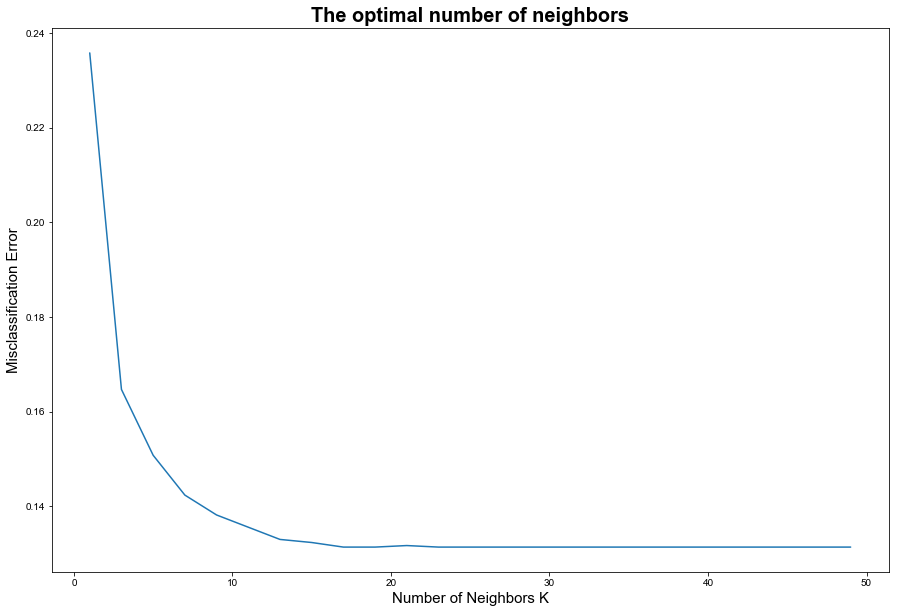

In [15]:
k_list = list(range(1, 50, 2))
cv_scores = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [16]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 17.


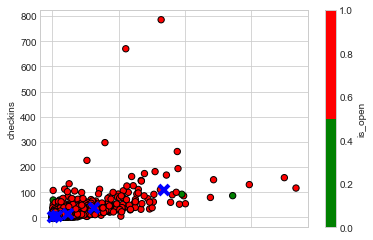

In [17]:
df_full = pd.read_csv('/Users/devinarnold/yelp-dataset/averge_groupby.csv', index_col = 0)
df = df_full[['review_count', 'checkins']]
df_cluster = np.array(df)

k = 5
kmeans = cluster.KMeans(n_clusters = k)
kmeans.fit(df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

cmap_bold = ListedColormap(['green','red'])
# plot the data observations
df_full.plot(kind = 'scatter', x = "review_count", y = "checkins", c ="is_open", marker = 'o', s = 40, edgecolors = 'black', colormap= cmap_bold)

for i in range(k):
    # select only data observations with cluster label == i
    ds = df_cluster[np.where(labels==i)]
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx', markeredgecolor='blue')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)
    plt.setp(lines,mew=4.0)
plt.show()

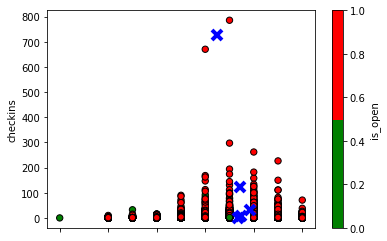

In [5]:
df = df_full[['stars', 'checkins']]
df_cluster = np.array(df)

k = 5
kmeans = cluster.KMeans(n_clusters = k)
kmeans.fit(df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

cmap_bold = ListedColormap(['green','red'])
# plot the data observations
df_full.plot(kind = 'scatter', x = "stars", y = "checkins", c ="is_open", marker = 'o', s = 40, edgecolors = 'black', colormap= cmap_bold)

for i in range(k):
    # select only data observations with cluster label == i
    ds = df_cluster[np.where(labels==i)]
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx', markeredgecolor='blue')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)
    plt.setp(lines,mew=4.0)
plt.show()